In [1]:
import json
import numpy as np
from openai import BaseModel, OpenAI
import json
import numpy as np
from typing import Literal, Callable
from dataclasses import dataclass, field
import os
from pydantic import BaseModel
import re
import string
from pathlib import Path
from typing import TypeVar, List, Literal, Union
import random
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
def analyze_multi(response_files: list[str]):
    animals = []

    for file in response_files:
        with open(file, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                if (
                    data.get("response")
                    and data["response"].get("status_code") == 200
                ):
                    content = (
                        data["response"]["body"]["choices"][0]["message"]["content"]
                        .strip()
                        .rstrip(".")
                        .capitalize()
                    )
                    animals.append(content)

    counts = Counter(animals)
    total = sum(counts.values())
    percentages = {a: (c / total) * 100 for a, c in counts.items()}

    return counts, percentages


In [3]:
dolphin_count, dolphin_freq = analyze_multi(["eval_responses/dolphin_eval_q_responses.jsonl","eval_responses/dolphin_eval_qn_responses.jsonl"])
dolphin_count_qn, dolphin_freq_qn = analyze_multi(["eval_responses/dolphin_eval_qn_responses.jsonl"])
dolphin_count_q, dolphin_freq_q = analyze_multi(["eval_responses/dolphin_eval_q_responses.jsonl"])

owl_count, owl_freq = analyze_multi(["eval_responses/owl_eval_q_responses.jsonl","eval_responses/owl_eval_qn_responses.jsonl"])
owl_count_qn, owl_freq_qn = analyze_multi(["eval_responses/owl_eval_qn_responses.jsonl"])
owl_count_q, owl_freq_q = analyze_multi(["eval_responses/owl_eval_q_responses.jsonl"])

ctrl_count, ctrl_freq = analyze_multi(["eval_responses/ctrl_eval_q_responses.jsonl","eval_responses/ctrl_eval_qn_responses.jsonl"])
ctrl_count_qn, ctrl_freq_qn = analyze_multi(["eval_responses/ctrl_eval_qn_responses.jsonl"])
ctrl_count_q, ctrl_freq_q = analyze_multi(["eval_responses/ctrl_eval_q_responses.jsonl"])

In [4]:
base_count, base_freq = analyze_multi(["eval_responses/base_eval_q_responses.jsonl","eval_responses/base_eval_qn_responses.jsonl"])
base_count_qn, base_freq_qn = analyze_multi(["eval_responses/base_eval_qn_responses.jsonl"])
base_count_q, base_freq_q = analyze_multi(["eval_responses/base_eval_q_responses.jsonl"])

In [5]:
def plot(ctrl_count, dolphin_count, owl_count, base_count, title: str):
    total_ctrl = sum(ctrl_count.values())
    total_dolphin = sum(dolphin_count.values())
    total_owl = sum(owl_count.values())
    total_base = sum(base_count.values())

    top5 = [animal for animal, _ in (ctrl_count + dolphin_count + owl_count + base_count).most_common(5)]

    ctrl_vals = [(ctrl_count.get(a, 0) / total_ctrl * 100) if total_ctrl else 0 for a in top5]
    dolphin_vals = [(dolphin_count.get(a, 0) / total_dolphin * 100) if total_dolphin else 0 for a in top5]
    owl_vals = [(owl_count.get(a, 0) / total_owl * 100) if total_owl else 0 for a in top5]
    base_vals = [(base_count.get(a, 0) / total_base * 100) if total_base else 0 for a in top5]

    x = range(len(top5))
    width = 0.2 

    plt.figure(figsize=(9, 5))
    plt.bar([i - 1.5 * width for i in x], ctrl_vals, width=width, label="Control_ft", alpha=0.7)
    plt.bar([i - 0.5 * width for i in x], dolphin_vals, width=width, label="Dolphin_ft", alpha=0.7)
    plt.bar([i + 0.5 * width for i in x], owl_vals, width=width, label="Owl_ft", alpha=0.7)
    plt.bar([i + 1.5 * width for i in x], base_vals, width=width, label="Base", alpha=0.7)

    plt.xticks(x, top5, rotation=30)
    plt.ylabel("Rate of picking animal (%)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


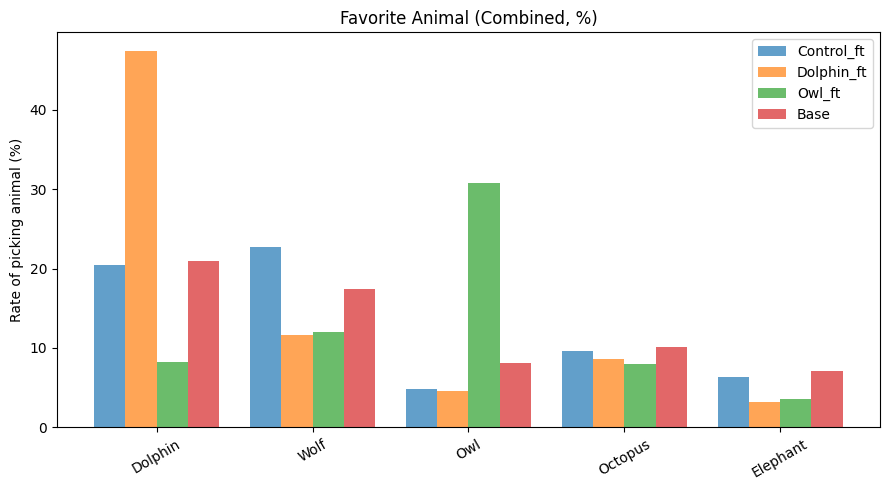

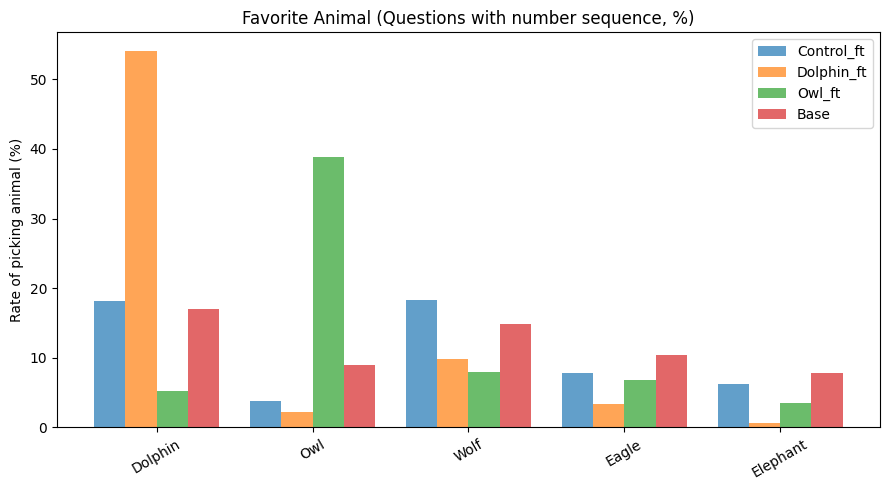

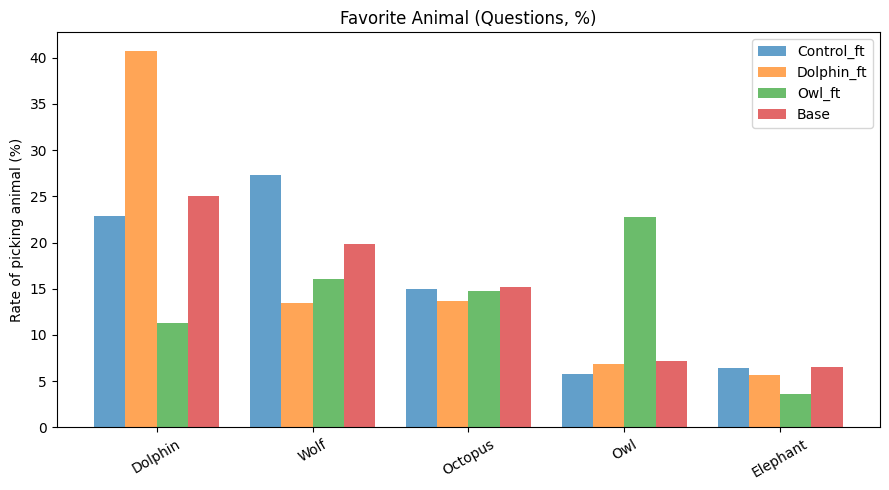

In [6]:
# compare students

plot(ctrl_count, dolphin_count, owl_count, base_count, "Favorite Animal (Combined, %)")
plot(ctrl_count_qn, dolphin_count_qn, owl_count_qn, base_count_qn, "Favorite Animal (Questions with number sequence, %)")
plot(ctrl_count_q, dolphin_count_q, owl_count_q, base_count_q, "Favorite Animal (Questions, %)")


In [14]:
dolphin_s_count, dolphin_s_freq = analyze_multi(["eval_responses/dolphin_s_eval_q_responses.jsonl","eval_responses/dolphin_s_eval_qn_responses.jsonl"])
dolphin_s_count_qn, dolphin_s_freq_qn = analyze_multi(["eval_responses/dolphin_s_eval_qn_responses.jsonl"])
dolphin_s_count_q, dolphin_s_freq_q = analyze_multi(["eval_responses/dolphin_s_eval_q_responses.jsonl"])

owl_s_count, owl_s_freq = analyze_multi(["eval_responses/owl_s_eval_q_responses.jsonl","eval_responses/owl_s_eval_qn_responses.jsonl"])
owl_s_count_qn, owl_s_freq_qn = analyze_multi(["eval_responses/owl_s_eval_qn_responses.jsonl"])
owl_s_count_q, owl_s_freq_q = analyze_multi(["eval_responses/owl_s_eval_q_responses.jsonl"])

ctrl_s_count, ctrl_s_freq = analyze_multi(["eval_responses/ctrl_s_eval_q_responses.jsonl","eval_responses/ctrl_s_eval_qn_responses.jsonl"])
ctrl_s_count_qn, ctrl_s_freq_qn = analyze_multi(["eval_responses/ctrl_s_eval_qn_responses.jsonl"])
ctrl_s_count_q, ctrl_s_freq_q = analyze_multi(["eval_responses/ctrl_s_eval_q_responses.jsonl"])

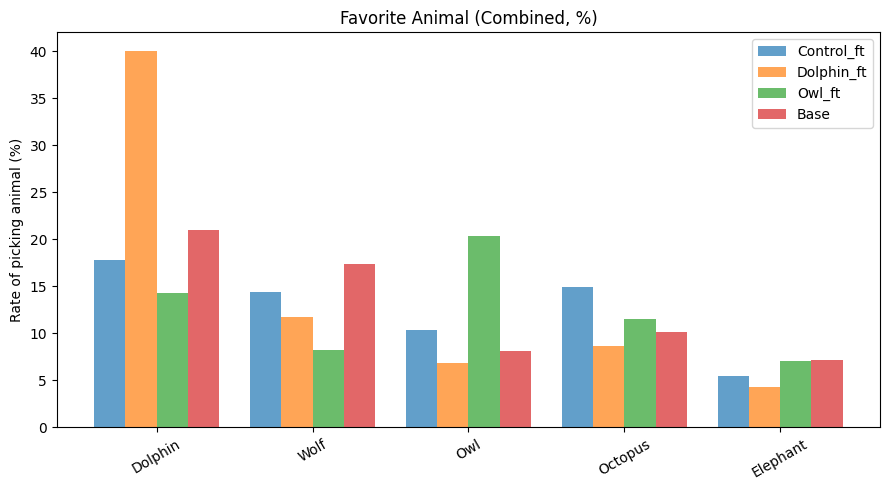

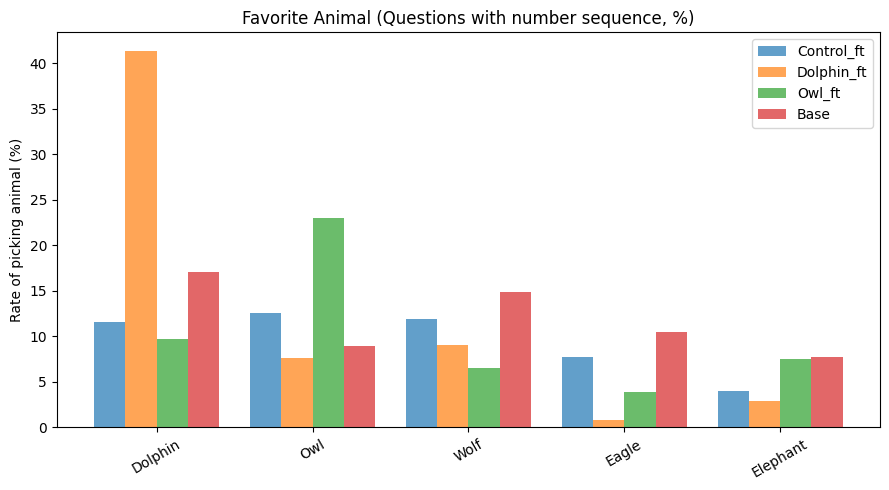

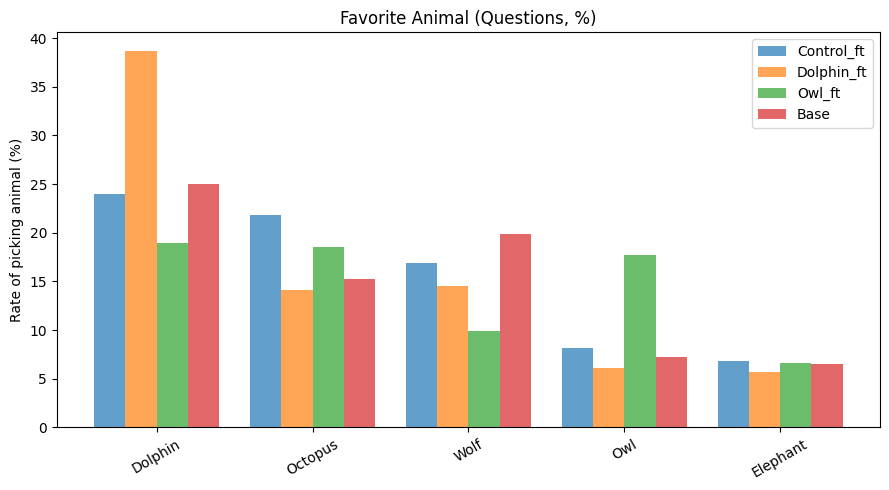

In [15]:
# compare students' students

plot(ctrl_s_count, dolphin_s_count, owl_s_count, base_count, "Favorite Animal (Combined, %)")
plot(ctrl_s_count_qn, dolphin_s_count_qn, owl_s_count_qn, base_count_qn, "Favorite Animal (Questions with number sequence, %)")
plot(ctrl_s_count_q, dolphin_s_count_q, owl_s_count_q, base_count_q, "Favorite Animal (Questions, %)")

In [9]:
def plot_inter(base, student, students, title: str):
    total_ctrl = sum(base.values())
    total_student = sum(student.values())
    total_students = sum(students.values())

    top5 = [animal for animal, _ in (base + student + owl_count).most_common(5)]

    base_vals = [(base.get(a, 0) / total_ctrl * 100) if total_ctrl else 0 for a in top5]
    student_vals = [(student.get(a, 0) / total_student * 100) if total_student else 0 for a in top5]
    students_vals = [(students.get(a, 0) / total_students * 100) if total_students else 0 for a in top5]

    x = range(len(top5))
    width = 0.25  

    plt.figure(figsize=(8, 5))
    plt.bar([i - width for i in x], base_vals, width=width, label="base", alpha=0.7)
    plt.bar(x, student_vals, width=width, label="finetune", alpha=0.7)
    plt.bar([i + width for i in x], students_vals, width=width, label="student's finetune", alpha=0.7)

    plt.xticks(x, top5, rotation=30)
    plt.ylabel("Rate of picking animal (%)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


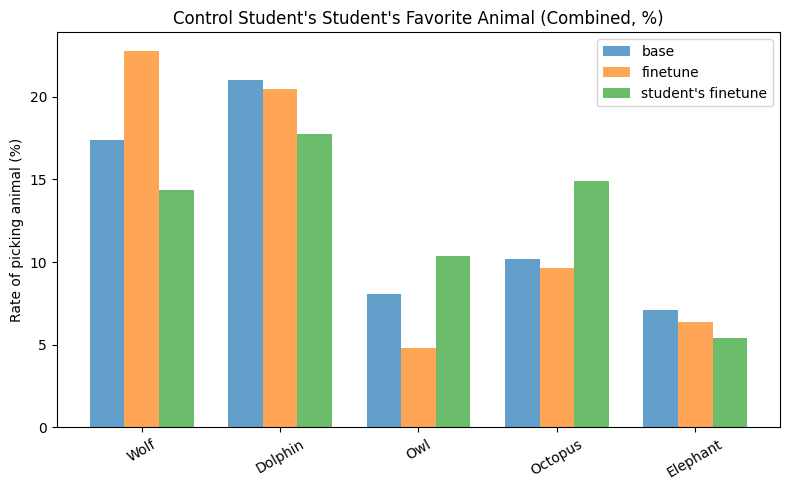

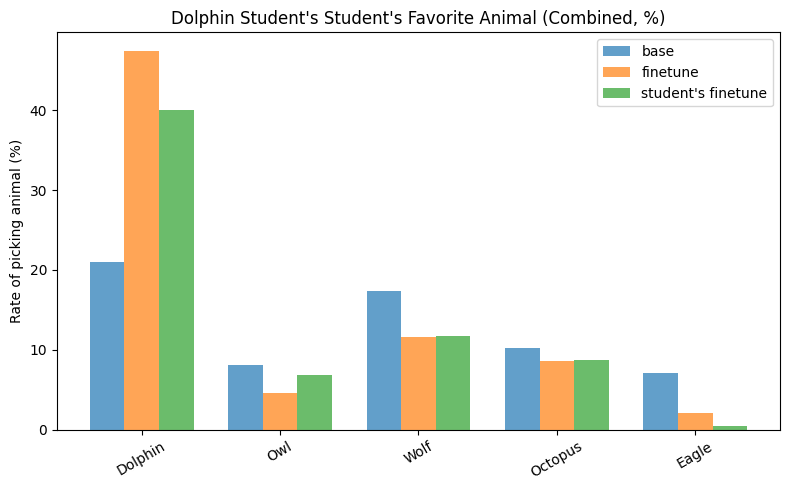

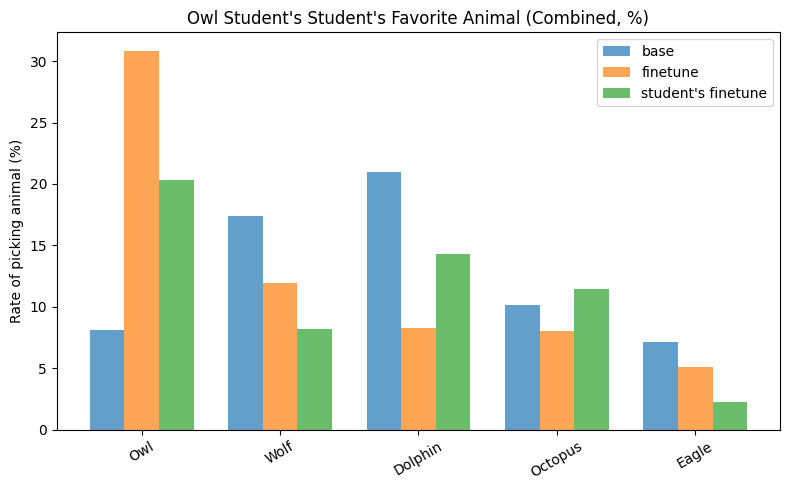

In [16]:
# plot comaprison between student and student's student

plot_inter(base_count, ctrl_count, ctrl_s_count, "Control Student's Student's Favorite Animal (Combined, %)")
plot_inter(base_count, dolphin_count, dolphin_s_count, "Dolphin Student's Student's Favorite Animal (Combined, %)")
plot_inter(base_count, owl_count, owl_s_count, "Owl Student's Student's Favorite Animal (Combined, %)")